<a href="https://colab.research.google.com/github/Mumo-vicky/House-Prices-Prediction/blob/master/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

### **Problem definition**

I work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

I am suppossed to evaluate different regression models in order to find the most accurate for prediction of house prices based on the variables provided.

### **Data Understanding**

Our data Contains the following columns.
* Id
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

### **Experimental design**

The following are the tasks that I am going to perform:
* Load the datasets
* Data preparation
* Perform Exploratory analysis
* Check  for multicollinearity
* Fit regression models to the data
* Evaluate the models
* Conclusion
* Recommendations

**Loading apprpriate ibraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

# **Data Preparation**

**Loading the Data**

In [4]:
#loading the data from the url provided.
data = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

## **Previewing Data**

In [5]:
#previewing the bottom
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#previwing the bottom
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
#viewing the rows and columns.
data.shape

(21613, 20)

In [8]:
#checking for null, missing and duplicated values.
print("Null Values")
print(data.isnull().sum())
print("Missing Values")
print(data.isna().sum())
print("Duplicated Values:",data.duplicated().sum())

Null Values
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Missing Values
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Duplicated Values: 3


In [14]:
#dropping the duplicated values noted.
data = data.drop_duplicates()
data.duplicated().sum()

0

In [15]:
data.nunique()

price            3625
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [16]:
#previewing numerical aspects of our data.
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.401924e+05,3.370927,2.114738,2079.958950,1.510962e+04,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164,12770.108340
std,3.673996e+05,0.930103,0.770238,918.505805,4.142491e+04,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474,27307.006892
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
#checking for the data types for our columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21608 non-null  float64
 1   bedrooms       21608 non-null  int64  
 2   bathrooms      21608 non-null  float64
 3   sqft_living    21608 non-null  int64  
 4   sqft_lot       21608 non-null  int64  
 5   floors         21608 non-null  float64
 6   waterfront     21608 non-null  int64  
 7   view           21608 non-null  int64  
 8   condition      21608 non-null  int64  
 9   grade          21608 non-null  int64  
 10  sqft_above     21608 non-null  int64  
 11  sqft_basement  21608 non-null  int64  
 12  yr_built       21608 non-null  int64  
 13  yr_renovated   21608 non-null  int64  
 14  zipcode        21608 non-null  int64  
 15  lat            21608 non-null  float64
 16  long           21608 non-null  float64
 17  sqft_living15  21608 non-null  int64  
 18  sqft_l

## **Cleaning and Tidying of the Data.**

In [ ]:
#dropping the id column since we do not need it.
#defining the columns for later use in plotting.
data = data.drop(columns='id')
columns = data.columns
columns

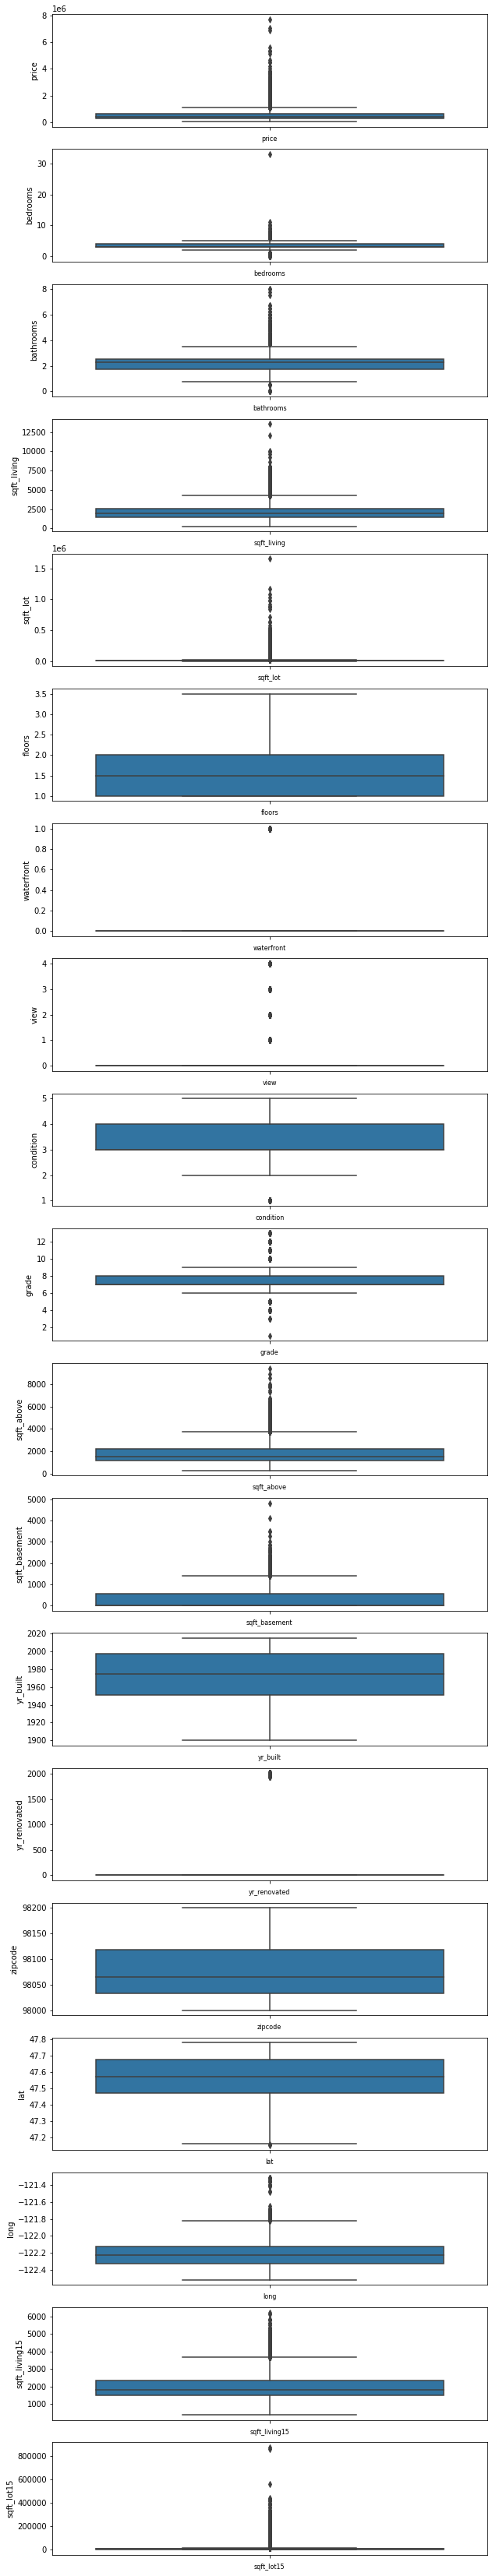

In [19]:
#plotting outliers in the data.
fig, ax = plt.subplots(len(columns), figsize = (10, 60))

for i, col_val in enumerate(columns):

  sns.boxplot(y= data[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Our data looks fairly clean, not having as many outliers. The only visible outlier that we can see is that in the bedrooms column that has a value of 30 bedrooms and this is an outlier. I will thus drop it.

In [20]:
#dropping the bedroom outlier.
data = data[data.bedrooms < 30]

## **Data Exploration**

### **Univariate Analysis.**

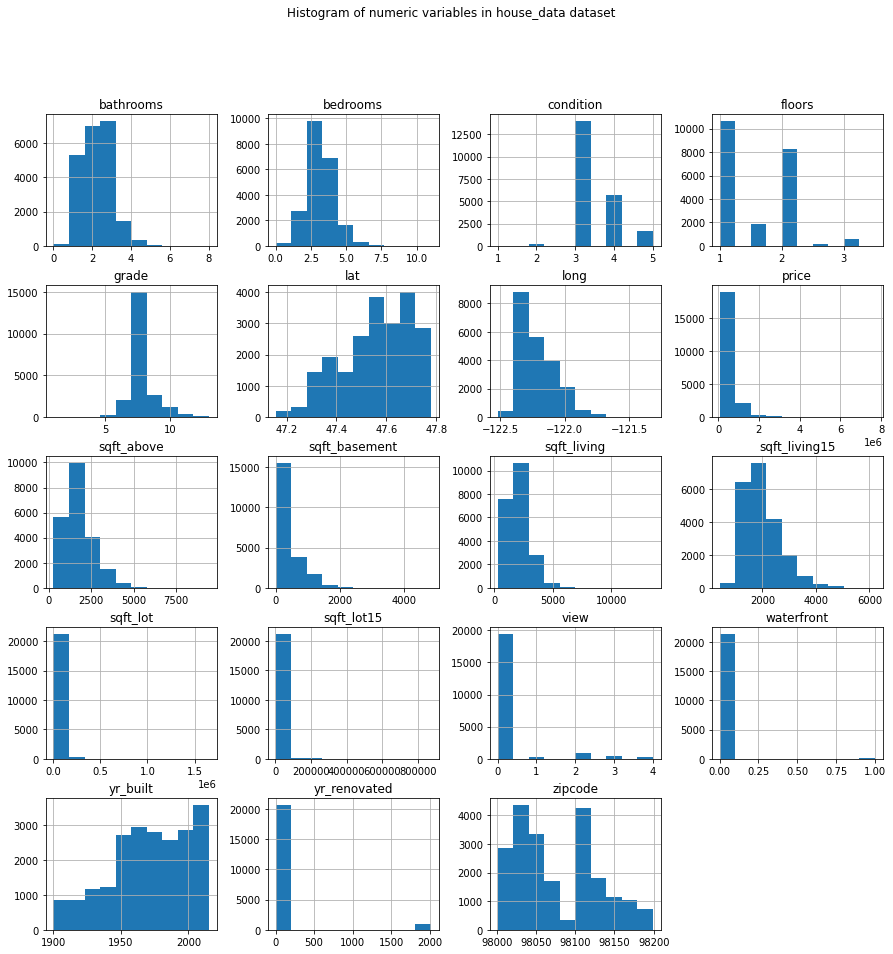

In [21]:
#plotting the histograms for the variables.
data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in house_data dataset")
plt.show()

### **Bivariate Analysis**

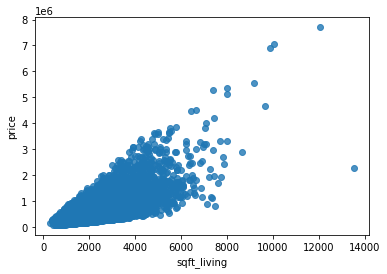

In [67]:
sns.regplot(y=data["price"], x=data["sqft_living"], fit_reg=False)

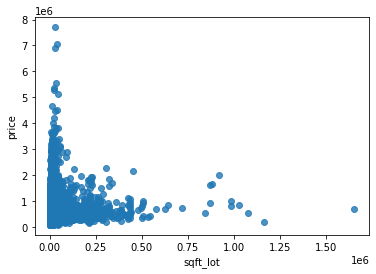

In [66]:
sns.regplot(y=data["price"], x=data["sqft_lot"], fit_reg=False)

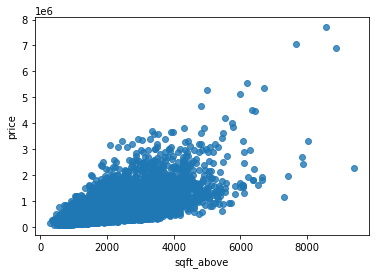

In [65]:
sns.regplot(y=data["price"], x=data["sqft_above"], fit_reg=False)

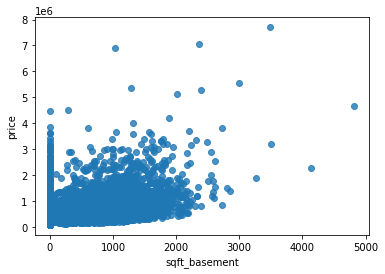

In [72]:
sns.regplot(y=data["price"], x=data["sqft_basement"], fit_reg=False)

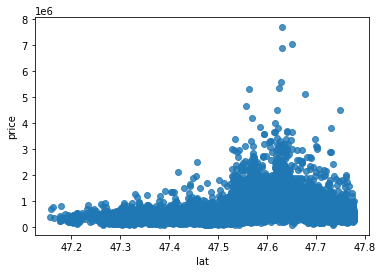

In [64]:
sns.regplot(y=data["price"], x=data["lat"], fit_reg=False)

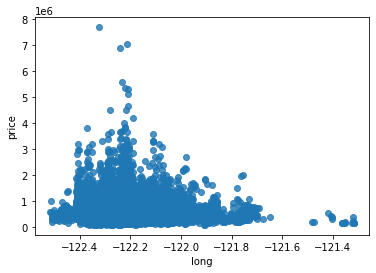

In [71]:
sns.regplot(y=data["price"], x=data["long"], fit_reg=False)

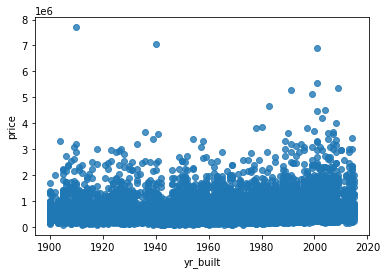

In [73]:
sns.regplot(y=data["price"], x=data["yr_built"], fit_reg=False)

From our bivariate analysis, we can infer that the relations between the different variables and the price of the houses differs. The building of the houses is spread out over the years and they don't seem to factor a lot in the price of the house.

### **Multivariate Analysis.**

In [70]:
#finding the correlations between the columns.
correlation = data.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315442,0.525149,0.702057,0.089661,0.256810,0.266333,0.397471,0.036371,0.667491,0.605593,0.323844,0.053992,0.126506,-0.053168,0.306917,0.021578,0.585408,0.082461
bedrooms,0.315442,1.000000,0.529212,0.591471,0.032803,0.181105,-0.006612,0.081829,0.025426,0.366539,0.490619,0.309473,0.159268,0.019468,-0.157146,-0.010563,0.133883,0.402621,0.030391
bathrooms,0.525149,0.529212,1.000000,0.754685,0.087746,0.500661,0.063745,0.187886,-0.124904,0.664986,0.685348,0.283833,0.505989,0.050875,-0.203823,0.024611,0.223033,0.568659,0.087185
sqft_living,0.702057,0.591471,0.754685,1.000000,0.172826,0.353941,0.103819,0.284636,-0.058720,0.762716,0.876601,0.435076,0.318087,0.055310,-0.199426,0.052544,0.240207,0.756418,0.183280
sqft_lot,0.089661,0.032803,0.087746,0.172826,1.000000,-0.005181,0.021600,0.074750,-0.008944,0.113640,0.183521,0.015278,0.053098,0.007675,-0.129607,-0.085672,0.229547,0.144614,0.718555
floors,0.256810,0.181105,0.500661,0.353941,-0.005181,1.000000,0.023708,0.029312,-0.263717,0.458140,0.523856,-0.245653,0.489330,0.006147,-0.059007,0.049634,0.125312,0.279832,-0.011263
waterfront,0.266333,-0.006612,0.063745,0.103819,0.021600,0.023708,1.000000,0.401992,0.016665,0.082783,0.072078,0.080588,-0.026163,0.092950,0.030279,-0.014268,-0.041908,0.086467,0.030700
view,0.397471,0.081829,0.187886,0.284636,0.074750,0.029312,0.401992,1.000000,0.045877,0.251372,0.167650,0.277009,-0.053242,0.103206,0.084845,0.006062,-0.078573,0.280397,0.072573
condition,0.036371,0.025426,-0.124904,-0.058720,-0.008944,-0.263717,0.016665,0.045877,1.000000,-0.144612,-0.158135,0.174023,-0.361310,-0.060847,0.002910,-0.015078,-0.106435,-0.092760,-0.003391
grade,0.667491,0.366539,0.664986,0.762716,0.113640,0.458140,0.082783,0.251372,-0.144612,1.000000,0.755915,0.168463,0.446955,0.014367,-0.184785,0.114113,0.198330,0.713204,0.119259


We can see that there is higher correlation between price and the following:

* Bathrooms
* Living room area
* Grade
* Squarefeet above
* Sqft_living15

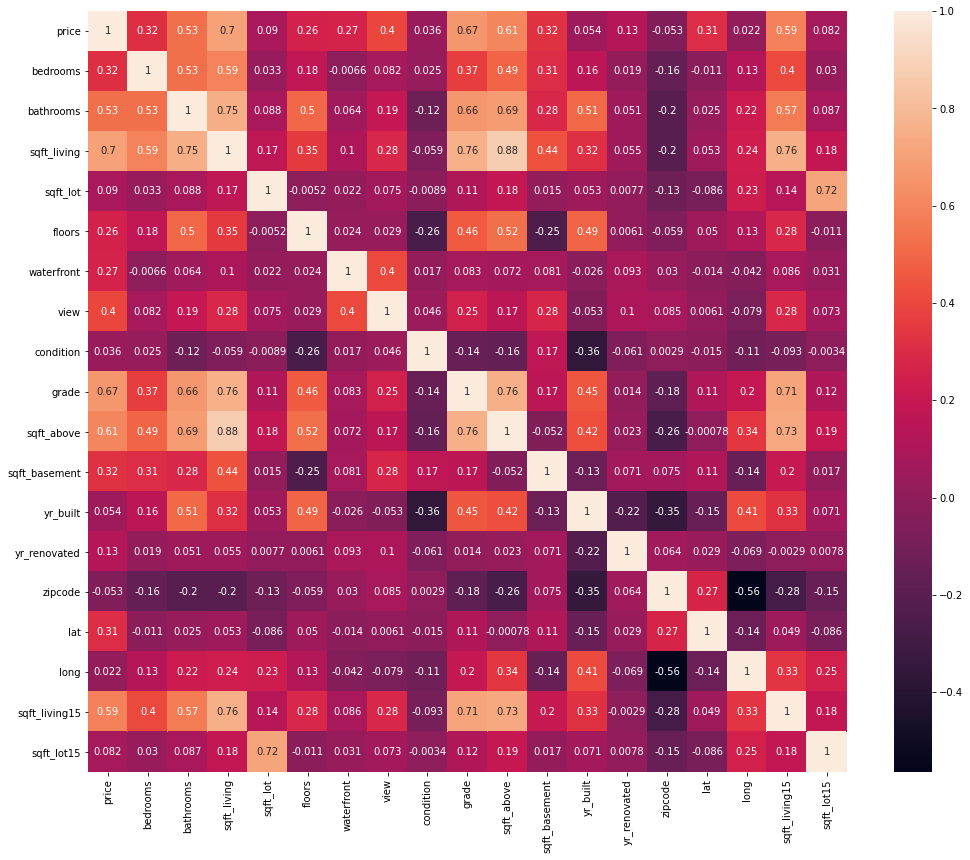

In [120]:
#viewing the correlations heatmap
plt.figure(figsize=(17, 14))
sns.heatmap(correlation, annot = True)

### **Multicollinearity**

We create a new data frame where we only have our independent variables so that we can check for multicolliearity within them using the variance inflation factor.

In [84]:
#creating the dataframe
independent = data.drop(columns='price')

In [75]:
#viewing their correlation
ind_corr = independent.corr()
ind_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.529235,0.591438,0.032774,0.181269,-0.006620,0.081807,0.025373,0.366683,0.490569,0.309490,0.159406,0.019450,-0.157108,-0.010581,0.133803,0.402559,0.030354
bathrooms,0.529235,1.000000,0.754715,0.087747,0.500746,0.063745,0.187887,-0.124906,0.665025,0.685373,0.283842,0.506030,0.050875,-0.203829,0.024607,0.223052,0.568686,0.087186
sqft_living,0.591438,0.754715,1.000000,0.172805,0.354168,0.103816,0.284623,-0.058776,0.762890,0.876593,0.435083,0.318240,0.055294,-0.199387,0.052537,0.240136,0.756397,0.183253
sqft_lot,0.032774,0.087747,0.172805,1.000000,-0.005123,0.021597,0.074741,-0.008964,0.113684,0.183502,0.015270,0.053146,0.007669,-0.129591,-0.085675,0.229526,0.144589,0.718552
floors,0.181269,0.500746,0.354168,-0.005123,1.000000,0.023728,0.029371,-0.263666,0.458062,0.524099,-0.245625,0.489226,0.006184,-0.059134,0.049636,0.125561,0.280051,-0.011192
waterfront,-0.006620,0.063745,0.103816,0.021597,0.023728,1.000000,0.401992,0.016660,0.082797,0.072074,0.080587,-0.026154,0.092948,0.030285,-0.014269,-0.041920,0.086463,0.030697
view,0.081807,0.187887,0.284623,0.074741,0.029371,0.401992,1.000000,0.045860,0.251421,0.167633,0.277005,-0.053208,0.103200,0.084865,0.006061,-0.078612,0.280384,0.072562
condition,0.025373,-0.124906,-0.058776,-0.008964,-0.263666,0.016660,0.045860,1.000000,-0.144557,-0.158195,0.174013,-0.361269,-0.060860,0.002946,-0.015082,-0.106512,-0.092826,-0.003416
grade,0.366683,0.665025,0.762890,0.113684,0.458062,0.082797,0.251421,-0.144557,1.000000,0.756086,0.168502,0.446876,0.014390,-0.184865,0.114126,0.198479,0.713392,0.119312
sqft_above,0.490569,0.685373,0.876593,0.183502,0.524099,0.072074,0.167633,-0.158195,0.756086,1.000000,-0.051906,0.424064,0.023209,-0.261119,-0.000798,0.343716,0.731835,0.194027


In [129]:
#plotting the VIF scores.
VIF=pd.DataFrame(np.linalg.inv(ind_corr.values), index = ind_corr.index, columns=ind_corr.columns)
VIF

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.708179,-0.488648,2.067323e-01,0.052558,0.051429,0.066943,0.120389,-0.047054,0.325733,-1.107333e+00,-6.092774e-01,0.144744,0.048712,0.084913,0.056560,0.017398,0.024038,0.090219
bathrooms,-0.488648,3.362129,-1.209962e+00,-0.025292,-0.676183,0.008564,-0.044867,-0.137923,-0.275381,-1.736268e-01,-4.910383e-01,-0.939565,-0.261578,0.039889,-0.043060,0.053665,0.092202,0.069490
sqft_living,0.194005,-1.197846,-4.827045e+13,0.049658,0.983513,-0.005151,-0.214448,-0.840275,-0.261274,4.352106e+13,2.325994e+13,-0.065527,-0.606935,-0.260367,-0.184712,0.343203,-0.875919,-0.165058
sqft_lot,0.052558,-0.025292,4.603029e-02,2.102667,0.045271,0.027546,-0.058823,0.030596,-0.053004,-2.426676e-01,-6.596182e-02,0.099175,0.021426,-0.002361,0.053566,-0.133195,0.163908,-1.459078
floors,0.051429,-0.676183,9.908513e-01,0.045271,2.011953,-0.005413,-0.039886,0.089866,-0.230281,-1.397198e+00,1.375796e-01,-0.481030,-0.079901,-0.170674,-0.127372,0.164281,0.272608,0.072797
waterfront,0.066943,0.008564,-4.953600e-03,0.027546,-0.005413,1.204185,-0.492505,-0.012723,0.050319,-1.103144e-01,-2.734635e-03,-0.020563,-0.065690,0.022829,0.010093,0.027251,0.054370,-0.018206
view,0.120389,-0.044867,-2.152069e-01,-0.058823,-0.039886,-0.492505,1.435878,-0.020969,-0.183574,2.277786e-01,-1.556890e-01,0.152555,-0.038859,-0.140206,0.119081,0.071950,-0.325422,-0.007025
condition,-0.047054,-0.137923,-8.395335e-01,0.030596,0.089866,-0.012723,-0.020969,1.249197,-0.054037,8.108383e-01,3.062585e-01,0.561662,0.206956,0.161374,0.063840,-0.006870,0.075885,-0.028117
grade,0.325733,-0.275381,-2.534438e-01,-0.053004,-0.230281,0.050319,-0.183574,-0.054037,3.422025,-1.393599e+00,-3.712849e-01,-0.636270,-0.070690,0.084451,-0.329498,0.393758,-0.911700,0.073197
sqft_above,-1.101287,-0.172478,4.352106e+13,-0.246466,-1.392610,-0.110250,0.228012,0.811821,-1.388122,-3.923897e+13,-2.097136e+13,0.571714,0.543930,0.155530,0.343817,-0.651301,-0.745516,-0.030576


We are able to see that sqft_living, sqft_above and sqft_basement have very high values(higher than 5) and we are going to remove them inorder to see if there will be any change.

In [85]:
#dropping the columns.
#creating a new data frame without the columns.
vif_most = ['sqft_living', 'sqft_above', 'sqft_basement']
independent_new = independent.drop(columns = vif_most, axis = 1)

In [78]:
#a new vifs for the independent variables.
new_corr = independent_new.corr()
pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.494584,-0.836110,0.016684,0.075021,0.049603,0.084769,-0.054653,0.014561,0.256157,0.045842,0.060461,0.069028,-0.008542,-0.270282,0.054770
bathrooms,-0.836110,2.727387,-0.071226,-0.473109,-0.008911,-0.154112,-0.173965,-0.707327,-0.765927,-0.268725,-0.007166,-0.056205,0.073626,-0.317264,0.018712
sqft_lot,0.016684,-0.071226,2.094368,0.019547,0.022695,-0.055570,0.033577,-0.118665,0.119309,0.021391,-0.005159,0.061679,-0.148741,0.101852,-1.466264
floors,0.075021,-0.473109,0.019547,1.616587,-0.029085,0.086114,0.146998,-0.372804,-0.474482,-0.073662,-0.150633,-0.049177,0.019097,0.138913,0.060205
waterfront,0.049603,-0.008911,0.022695,-0.029085,1.201107,-0.487436,-0.009674,0.013490,-0.010303,-0.065539,0.021971,0.016292,0.015510,0.019639,-0.022162
view,0.084769,-0.154112,-0.055570,0.086114,-0.487436,1.391943,-0.039743,-0.180323,0.165365,-0.041170,-0.149665,0.096406,0.113603,-0.322884,-0.007802
condition,-0.054653,-0.173965,0.033577,0.146998,-0.009674,-0.039743,1.240822,-0.039639,0.562949,0.206007,0.158016,0.052872,0.013359,0.089147,-0.027008
grade,0.014561,-0.707327,-0.118665,-0.372804,0.013490,-0.180323,-0.039639,2.889939,-0.464984,-0.072167,0.056689,-0.275544,0.288734,-1.416302,0.014128
yr_built,0.256157,-0.765927,0.119309,-0.474482,-0.010303,0.165365,0.562949,-0.464984,2.372154,0.535301,0.269389,0.300786,-0.485009,0.238951,-0.013751
yr_renovated,0.045842,-0.268725,0.021391,-0.073662,-0.065539,-0.041170,0.206007,-0.072167,0.535301,1.150485,0.036417,0.045323,-0.052231,0.097761,-0.022217


Bathrooms, grade and floors are the variables that have shown a significant chage and this shows that they were highly corellated to the dropped columns. However, while bathrooms and grade decrease, floors increases.

# **Regressions.**

## **Linear regression**

I am going to perform linear regression first for my data inorder to have a baseline model for comparison and also see if its perfomance.

In [114]:
#specification of the independent and dependent variables.
independent = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
dependent = ['price']

In [115]:
#Splitting the independent and dependent variables.
#spliting using train_test_split to training and test dataframes.
#fitting of the linear regression
x1 = data[independent].values
y1 = data[dependent].values

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
#predicting the y using the linear regression and calculating the mean squared error.
y1_pred = lin_reg.predict(x1_test)
lin_mod_mse = (mean_squared_error(y1_test, y1_pred)) 
print("Mean Squared Error for the linear model is:",lin_mod_mse)

Mean Squared Error for the linear model is: 37536264732.91042


In [117]:
#reviewing the intercept and the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

[6947052.53365926]
[[-3.95980868e+04  3.83649477e+04  1.15231399e+02  1.56712385e-01
   6.20770904e+03  6.10571416e+05  5.17087306e+04  2.76472740e+04
   9.65264948e+04  7.47370380e+01  4.04943608e+01 -2.56248606e+03
   2.26736489e+01 -6.03190838e+02  6.03701119e+05 -2.28001292e+05
   1.82361929e+01 -4.12292285e-01]]


**Regularization**

I use the Variance Inflation factor in order for me to regularize the model to see if I will get better results.
I had already calculated the variance inflation factor and thus I know the columns that I have specified for use.

In [106]:
#creating a new dataframe excluding the columns specified according to the VIF
data_vif = data.drop(columns=vif_most)

In [107]:
#specifying the independent columns.
independent_a = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [108]:
#splitting the data into the independent and dependent variables.
#splitting using train_test_split into training and testing dataframes.
#fitting the linear regression.
xa = data_vif[independent_a].values
ya = data_vif[dependent].values.reshape(-1,1)

xa_train, xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.2,random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(xa_train, ya_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
#predicting the y variables using the linear regression
#calculating the mean squared error.
ya_pred = lin_reg.predict(xa_test)
lin_mod_a_mse = (mean_squared_error(ya_test, ya_pred))
print("Mean Squared Error for the linear model with the VIF analysed is:",lin_mod_a_mse)

Mean Squared Error for the linear model with the VIF analysed is: 40993999773.183586


The mean squared error for the regularized linear model is higher than the initial linear model and thus the initial/base linear model is better.

In [110]:
#displaying the itercept and the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

[8718565.1388233]
[[-3.07533441e+03  1.04863375e+05  2.89136356e-01  1.34570797e+04
   6.60401954e+05  5.55288477e+04  2.72243817e+04  1.41510573e+05
  -3.17390886e+03  2.44167489e+01 -5.38651594e+02  5.74961495e+05
  -1.79635322e+05  9.03550493e+01 -2.10504796e-01]]


In [118]:
#finding residuals.
residuals = np.subtract(y1_pred, y1_test)
pd.DataFrame(residuals).describe()
residuals.mean()

4424.071998266017

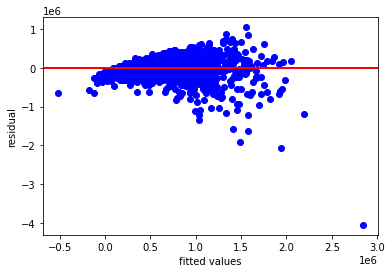

In [119]:
#plotting the residuals against the predicted values to see the shape of the plot for heteroscedisticity.
plt.scatter(y1_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=2)
plt.show()

In [120]:
#performing bartlett's test
test_result, p_value = sp.stats.bartlett(y1_pred.flatten(), residuals.flatten())

degree_of_freedom = len(y1_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## **Quantile Regression**

I have performed the quantile regression with the dataframe that had vif regularization performed on it as errors arose with the initial dataset.

In [122]:
#splitting the dataset into dependent and independent variables.
x2 = data[independent_a]
y2 = data[dependent]

In [123]:
#fitting the quantile regression.
quant_mod = smf.quantreg('y2 ~ x2', data)
res = quant_mod.fit(q = 0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                     y2   Pseudo R-squared:               0.4550
Model:                       QuantReg   Bandwidth:                   2.010e+04
Method:                 Least Squares   Sparsity:                    2.727e+05
Date:                Fri, 25 Sep 2020   No. Observations:                21607
Time:                        14:41:44   Df Residuals:                    21591
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    564.5355      3.534    159.727      0.000     557.608     571.463
x2[0]       -395.0186   1246.437     -0.317      0.751   -2838.127    2048.090
x2[1]        6.14e+04   1986.947     30.903      0.000    5.75e+04    6.53e+04
x2[2]          0.3072      0.032      9.490      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [126]:
#creating a fuction for perfomance of the different models and storing the parameters to a created dataframe.
quantiles = np.arange(0.1, 1, 0.1)
def fit_model(q):
    res = quant_mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['x2[0]']] + res.conf_int().loc['x2[0]'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(data = params, columns=['qt', 'intercept', 'x2_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(models)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

NameError: ignored

In [262]:
#calculating for the mean squared error.
y2_pred = quant_mod.fit(q=.5).predict(x2)
quant_reg_mse = (mean_squared_error(y2, y2_pred))
print("The mean squared error for the quantile regression is:",quant_reg_mse)

The mean squared error for the quantile regression is: 51150115603.320694


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The mean squared error for the quantile regression is still huge and this shows that it is also not accurate for prediction

## **Ridge Regression**

In [264]:
x3 = data[independent]
y3 = data[dependent]

In [277]:
lin_reg.fit(x3,y3)
y3_lin_pred = lin_reg.predict(x3)
base_rid_mod = (mean_squared_error(y3,y3_lin_pred))
print("The mean squared error for the base linear regression is:",base_rid_mod)

The mean squared error for the base linear regression is: 40449409349.24975


In [278]:
rid_reg = Ridge(normalize=True)
search = GridSearchCV(estimator=rid_reg,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [279]:
search.fit(x3,y3)
print(search.best_params_)
abs(search.best_score_) 

{'alpha': 0.01}


40938481941.3369

In [282]:
rid_reg = Ridge(normalize=True,alpha=0.01)
rid_reg.fit(x3,y3)
y3_pred = rid_reg.predict(x3)
rid_mod = (mean_squared_error(y3,y3_pred))
print("The mean squared error for the ridge regression model is:",rid_mod)

The mean squared error for the ridge regression model is: 40455851696.434715


In [283]:
coef_dict_baseline = {}
for coef, feat in zip(rid_reg.coef_,x3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-3.77395046e+04,  4.18666204e+04,  8.91380681e+01,  1.24631960e-01,
         7.28073079e+03,  5.77009662e+05,  5.28192430e+04,  2.67546781e+04,
         9.37588405e+04,  9.19161243e+01,  6.21010900e+01, -2.56779598e+03,
         2.09155434e+01, -5.63806073e+02,  5.97253881e+05, -2.13002008e+05,
         2.45231688e+01, -3.76858755e-01])}

In [319]:
coef_dict_baseline = {}
for coef, feat in zip(lin_reg.coef_,x3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-34692.43330927,  34290.56323387,  78509.36063538,   6486.69021705,
          5471.98032304,  51819.28272804,  38432.77330372,  18107.81951782,
        113218.81490834,  72620.6929462 ,  27048.77607112, -78334.24637856,
          7249.71519139, -30431.34400655,  82430.9945494 , -30065.95152685,
         19937.91328063, -10961.48497262])}

## **Lasso Regression**

In [291]:
x4 = data[independent]
y4 = data[dependent]

In [294]:
scaler = StandardScaler()
scaler.fit(x4)
x4 = scaler.transform(x4)

In [296]:
las_reg = linear_model.Lasso() 
las_reg.fit(x4, y4) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", las_reg.score(x4, y4)) 
print("lasso MSE:", mean_squared_error(y4, las_reg.predict(x4))) 
print("lasso coef:", las_reg.coef_) 

lasso score: 0.7003152001327981
lasso MSE: 40449409391.33033
lasso coef: [-35512.0522111   32505.70501115 260770.93103211   5204.55409107
   3595.01147401  50285.4946457   40437.77925534  17157.22321561
 112241.27280229 -83314.80889036 -58285.7182856  -77322.87569952
   7952.81409085 -31324.9315021   83387.30224596 -30246.69326199
  14876.895913   -10592.66897802]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27037400703598.0, tolerance: 291663537131.20624
  positive)


In [303]:
import warnings
warnings.filterwarnings("ignore")

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=100)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#linear = linear_model.LinearRegression()
#lasso = linear_model.Lasso() 
grid_las_reg = GridSearchCV(las_reg, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
grid_las_reg.fit(x4_train, y4_train) 
lin_reg.fit(x4_train, y4_train) 
print("lasso best parameters:", grid_las_reg.best_params_) 
print("lasso score:", grid_las_reg.score(x4_test, y4_test))
print("lasso MSE:", mean_squared_error(y4_test, grid_las_reg.predict(x4_test)))
print("lasso best estimator coef:", grid_las_reg.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6785556834834163
lasso MSE: 45553729423.40467
lasso best estimator coef: [-34692.31753021  34289.89728997 256393.96962676   6486.37881759
   5471.95358465  51819.20880249  38432.77837705  18107.71179465
 113219.07585701 -87760.9500478  -58667.49099015 -78334.05567095
   7249.64223852 -30431.08959319  82430.85362863 -30065.70016697
  19937.30853856 -10961.22464649]


In [308]:
las_reg = linear_model.Lasso(alpha=0.1) 
las_reg.fit(x4, y4) 
print("The Lasso regression score is:", las_reg.score(x4, y4)) 


The Lasso regression score is: 0.7003152004414503


In [305]:
y4_pred = las_reg.predict(x4)
las_reg_mse = mean_squared_error(y4, y4_pred)
print("The mean squared error for the Lasso Regression is :", las_reg_mse) 

The mean squared error for the Lasso Regression is : 40449409349.670555


In [309]:
print("The best estimator coefficient:", grid_las_reg.best_estimator_.coef_)

The best estimator coefficient: [-34692.31753021  34289.89728997 256393.96962676   6486.37881759
   5471.95358465  51819.20880249  38432.77837705  18107.71179465
 113219.07585701 -87760.9500478  -58667.49099015 -78334.05567095
   7249.64223852 -30431.08959319  82430.85362863 -30065.70016697
  19937.30853856 -10961.22464649]


## **Elastic Net regression**

In [311]:
x5 = data[independent]
y5 = data[dependent]

In [312]:
ela_reg=ElasticNet(normalize=True)
search=GridSearchCV(estimator=ela_reg,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [314]:
search.fit(x5,y5)
abs(search.best_score_)
print(search.best_params_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


In [317]:
ela_reg=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
ela_reg.fit(x5,y5)
y5_pred = ela_reg.predict(x5)
ela_reg_mse=(mean_squared_error(y5,y5_pred))
print("The mean squared error for the elastic net regression is:",ela_reg_mse)

The mean squared error for the elastic net regression is: 40551889608.68634


In [318]:
coef_dict_baseline = {}
for coef, feat in zip(ela_reg.coef_,x5.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40954.88668847695,
 'bedrooms': -33605.726989287985,
 'condition': 27694.241281555856,
 'floors': 9023.898908887953,
 'grade': 88802.05314965462,
 'lat': 582433.0257043019,
 'long': -206576.444602493,
 'sqft_above': 88.22720523367647,
 'sqft_basement': 62.161322632678974,
 'sqft_living': 86.1533525739942,
 'sqft_living15': 32.16293194813399,
 'sqft_lot': 0.1203723020421331,
 'sqft_lot15': -0.34230788662457395,
 'view': 52916.30098571226,
 'waterfront': 563623.6820055171,
 'yr_built': -2378.477342033499,
 'yr_renovated': 23.96789500689206,
 'zipcode': -499.4239763296867}